# Graded Challenge 2 (Phase 1)

# I. Perkenalan

- Nama  : Ida Ayu Gede Ima Dewi Pertami
- Batch : HCK-004

Problems Statement:
- Membuat model Classification menggunakan Logistic Regression dan SVM untuk memprediksi income bracket menggunakan dataset

Objective :
- Untuk membantu memprediksi pendapatan rumah tangga

Penjabaran masalah :
- Kebutuhan akan kehidupan sehari-hari tidak terlepas dari pendapatan yang dihasilkan, baik pendapatan harian, mingguan atau bulanan. Oleh karena itu prediksi pendapatan rumah tangga sangat penting dikarenakan akan membantu dalam menciptakan pendapatan yang lebih baik, dalam memprediksi suatu data dapat dilakukan dengan beberapa algoritma diantaranya dengan Logistic Regression dan SVC. Beberapa atribut menjadi faktor penentu dalam menciptakan pendapatan yang lebih tinggi, diantaranya pendidikan yang tinggi mendapatkan peluang untuk mendapatkan penghasilan yang lebih tinggi dari pasangan itu sendiri yang nantinya dapat mempengaruhi pendapatan rumah tangga lebih dari $50.000/tahun. Selain itu faktor pengalaman bekerja juga menjadi salah satu faktor penentu tingginya pendapatan rumah tangga.

# II. Query SQL

- SELECT age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income_bracket
- FROM `bigquery-public-data.ml_datasets.census_adult_income`
- WHERE TRIM(workclass) != '?' AND workclass IS NOT NULL 
-   AND hours_per_week < 100
- LIMIT 7988;

# III. Import Libraries

In [358]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
import phik
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Evaluasi
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,ConfusionMatrixDisplay,confusion_matrix

# Save model
import joblib

import warnings
warnings.filterwarnings(action='ignore')

# IV. Data Loading

In [359]:
# Load dataset dan cek missing value non standard
missing_values = ["n/a", "na", "--", "none", "?", "-",' ?']
df = pd.read_csv('../g2/h8dsft_P1G2_dayuima.csv', na_values = missing_values)

- Missing value pada dataset diganti menjadi nan value

In [360]:
# Menampilkan 10 dataset teratas
df.head(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,77,Private,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,<=50K
2,38,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti,<=50K
3,28,Private,9th,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States,<=50K
4,37,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,<=50K
5,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
6,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K
7,27,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,37,Portugal,<=50K
8,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
9,30,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,Portugal,<=50K


In [361]:
# Menampilkan 10 dataset terbawah
df.tail(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
7978,55,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
7979,30,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
7980,35,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
7981,40,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,3411,0,40,United-States,<=50K
7982,42,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,2002,40,United-States,<=50K
7983,33,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
7984,36,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,2885,0,40,United-States,<=50K
7985,29,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
7986,48,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
7987,51,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [362]:
# Memeriksa informasi dasar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7988 entries, 0 to 7987
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             7988 non-null   int64 
 1   workclass       7988 non-null   object
 2   education       7988 non-null   object
 3   education_num   7988 non-null   int64 
 4   marital_status  7988 non-null   object
 5   occupation      7983 non-null   object
 6   relationship    7988 non-null   object
 7   race            7988 non-null   object
 8   sex             7988 non-null   object
 9   capital_gain    7988 non-null   int64 
 10  capital_loss    7988 non-null   int64 
 11  hours_per_week  7988 non-null   int64 
 12  native_country  7867 non-null   object
 13  income_bracket  7988 non-null   object
dtypes: int64(5), object(9)
memory usage: 873.8+ KB


In [363]:
# Mencari dataset yang duplikasi
df[df.duplicated()].shape

(1107, 14)

- Terdapat 1107 dataset yang terduplikasi

In [364]:
# Menampilkan letak dataset yang terduplikasi
df[df.duplicated()]

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
31,44,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,United-States,<=50K
89,61,Private,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
116,42,Private,9th,5,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
131,25,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
203,35,Self-emp-not-inc,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7942,54,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,35,United-States,<=50K
7966,55,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
7970,56,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
7977,29,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


- Mencari letak data duplikat ada di baris mana saja

In [365]:
# Menghapus dataset yang duplikasi
df.drop_duplicates(inplace=True)

- Menghapus 1107 baris dataset yang duplikasi

In [366]:
df[df.duplicated()].shape

(0, 14)

- Dataset duplikasi sudah dihandling dengan cara didrop

In [367]:
# Mencari missing value
df.isnull().sum()

age                 0
workclass           0
education           0
education_num       0
marital_status      0
occupation          5
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    121
income_bracket      0
dtype: int64

- Missing values terdapat pada kolom occupation (5) dan native_country (121)

In [368]:
# Melihat persentase missing value pada kolom yang terdapat missing values
# for i in df.columns:
#     if df[i].isnull().sum()>0:
#         print(i,"=",df[i].isnull().sum()*100/df.shape[0],"%")

In [369]:
# Melihat persentase missing value pada masing-masing kolom dan menghitung total persentase missing values pada dataset
missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage)

total_missing = df.isna().sum().sum()
percentage_missing = (total_missing / (df.shape[0] * df.shape[1])) * 100
print(f"Persentase keseluruhan missing values di DataFrame adalah: {percentage_missing:.2f}%")

age               0.000000
workclass         0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        0.072664
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    1.758465
income_bracket    0.000000
dtype: float64
Persentase keseluruhan missing values di DataFrame adalah: 0.13%


- Terlihat bahwa pesentase missing values tidak mencapai 5 % baik dilihat secara keseluruhan atau berdasarkan masing-masing kolom, maka missing values dihandling dengan cara di trimming
- Trimming yaitu menghapus baris atau kolom yang mengandung nilai yang hilang. Skema ini bisa diterapkan jika jumlah data yang hilang tidak terlalu banyak sehingga tidak berdampak pada kualitas analisis.

In [370]:
# Menghapus baris pada kolom occupation dan kolom native_country yang terdapat missing value 
df.dropna(subset=['occupation'], inplace=True)
df.dropna(subset=['native_country'], inplace=True)

In [371]:
(df.isnull().values.sum())

0

- Missing values pada kolom occupation dan kolom native_country sudah dihandling dengan cara ditrimming atau menghapus baris yang memiliki nilai yang hilang (NaN/null) pada kedua kolom tersebut

# V. Exploratory Data Analysis (EDA)

In [372]:
# Melihat nilai unik pada masing-masing kolom
for i in df:
    print(i, ':', df[i].unique(), '\n')

age : [39 77 38 28 37 45 55 27 31 30 46 70 40 52 41 72 57 61 63 32 56 58 44 53
 62 68 51 35 54 59 33 76 60 26 36 69 34 42 29 49 25 50 17 71 43 20 47 48
 24 64 66 65 18 21 23 19 22 73 81 90 67 74 83 75 79 78 80 82 84] 

workclass : [' Private' ' Local-gov' ' Self-emp-inc' ' Federal-gov' ' State-gov'
 ' Self-emp-not-inc' ' Without-pay'] 

education : [' 9th' ' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th'
 ' HS-grad'] 

education_num : [5 6 7 8 2 3 4 9] 

marital_status : [' Married-civ-spouse' ' Never-married' ' Divorced' ' Separated'
 ' Married-spouse-absent' ' Widowed' ' Married-AF-spouse'] 

occupation : [' Other-service' ' Priv-house-serv' ' Protective-serv'
 ' Machine-op-inspct' ' Tech-support' ' Exec-managerial'
 ' Farming-fishing' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Handlers-cleaners' ' Prof-specialty'
 ' Armed-Forces'] 

relationship : [' Wife' ' Husband' ' Own-child' ' Unmarried' ' Not-in-family'
 ' Other-relative'] 

race : [' Black' ' Whit

- Dapat dilihat bahwa dataset ini menjelaskan mengenai sensus pendapatan rumah tangga yang terdiri dari: usia, kelas pekerja, pendidikan, nomr pendidikan, status pernikahan, hubungan, ras, jenis kelamin, keuntungan, kerugian, jam per minggu, negara asal dan pendapatan.

In [373]:
# Menghitung jumlah pendapatan terbanyak 
df.income_bracket.value_counts()

 <=50K    5291
 >50K     1464
Name: income_bracket, dtype: int64

- Dari perhitungan di atas pendapatan  <=50K  lebih banyak jumlahnya daripada pendapatan yang >50K 

<AxesSubplot: xlabel='income_bracket', ylabel='count'>

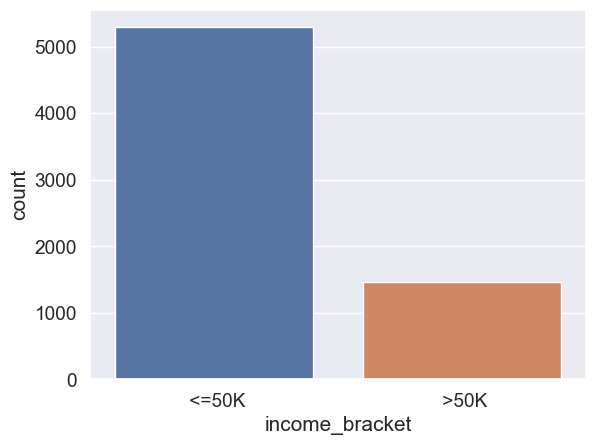

In [374]:
# Menampilkan barplot income bracket 
sns.countplot(data=df,x='income_bracket')

- Plot grafik diatas menunjukkan jumlah observasi pendapatan dalam dataset, persentase pendapatan <=50k (78,26%) lebih besar dari >50k (21,74%)

<AxesSubplot: xlabel='income_bracket', ylabel='age'>

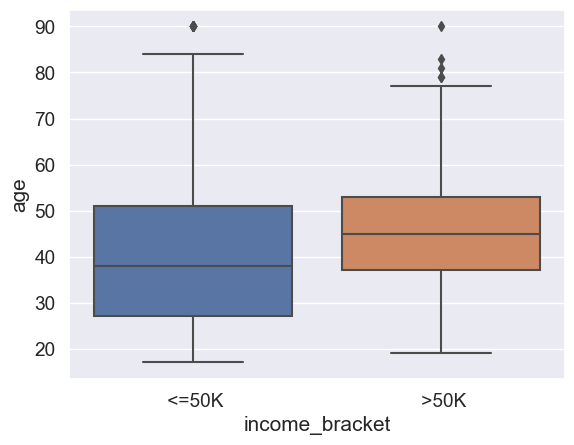

In [375]:
# Boxplot umur dengan pendapatan
sns.boxplot(x='income_bracket',y='age',data=df)

- Boxplot diatas menampilkan pendapatan berdasarkan usia

In [376]:
# Mengelompokan age dengan incomme bracket
df.groupby('age')[['income_bracket']].value_counts().sort_values(ascending = False)

age  income_bracket
17    <=50K            243
18    <=50K            198
33    <=50K            155
28    <=50K            147
31    <=50K            147
                      ... 
19    >50K               1
81    >50K               1
77    >50K               1
70    >50K               1
90    >50K               1
Length: 127, dtype: int64

- Jumlah orang yang memiliki pendapatan <=50K tertinggi ada pada usia 17

In [377]:
df.loc[df['age']== 90,['age','marital_status','income_bracket']]

,age,marital_status,income_bracket
417,90,Never-married,<=50K
622,90,Married-civ-spouse,<=50K
1403,90,Married-civ-spouse,<=50K
1805,90,Never-married,<=50K
3383,90,Married-civ-spouse,<=50K
3427,90,Married-civ-spouse,<=50K
5175,90,Married-civ-spouse,>50K
6545,90,Married-civ-spouse,<=50K
7261,90,Married-civ-spouse,<=50K
7488,90,Married-civ-spouse,<=50K


- Terdapat 10 orang yang berusia 90 tahun, usia 90 tahun adalah usia orang paling tua pada dataset ini dengan pendapatan rata" mereka <=50K

In [378]:
df.loc[df['hours_per_week']>= 79,['hours_per_week','income_bracket']]

,hours_per_week,income_bracket
177,99,<=50K
184,84,<=50K
514,80,>50K
742,80,<=50K
757,80,<=50K
...,...,...
7866,91,<=50K
7867,90,<=50K
7869,85,<=50K
7872,90,<=50K


- Jam kerja orang per minggunya paling tinggi 99 jam per minggu dengan penghasilan <=50K

In [379]:
# Mengelompokan kolom marital_status, sex dengan incomme bracket
df.groupby(['sex', 'marital_status'])[['income_bracket']].value_counts()

sex      marital_status          income_bracket
 Female   Divorced                <=50K             212
                                  >50K                5
          Married-AF-spouse       <=50K               3
                                  >50K                2
          Married-civ-spouse      <=50K             397
                                  >50K              160
          Married-spouse-absent   <=50K              33
          Never-married           <=50K             429
          Separated               <=50K              99
          Widowed                 <=50K             130
                                  >50K                3
 Male     Divorced                <=50K             174
                                  >50K               10
          Married-AF-spouse       <=50K               4
                                  >50K                1
          Married-civ-spouse      <=50K            2882
                                  >50K             1262


- Dari pengelompokan data di atas dapat dilihat bahwa jumlah orang yang pendapatannya <=50k dan >50k tertinggki terdapat pada laki-laki yang berstatus menikah dngan warga sipil

In [380]:
# Mengelompokan kolom workclass dengan incomme bracket
df.groupby('workclass')[['income_bracket']].value_counts()

workclass          income_bracket
 Federal-gov        <=50K              70
                    >50K               69
 Local-gov          <=50K             290
                    >50K               85
 Private            <=50K            4220
                    >50K              972
 Self-emp-inc       <=50K             133
                    >50K              111
 Self-emp-not-inc   <=50K             443
                    >50K              182
 State-gov          <=50K             130
                    >50K               45
 Without-pay        <=50K               5
dtype: int64

- Dari data diatas dapat dilihat bahwa pekerjaan pegawai swasta merupakan pekerjaan dengan jumlah terbanyak

In [381]:
# Mengelompokan kolom occupation dengan incomme bracket
df.groupby('occupation')[['income_bracket']].value_counts()

occupation          income_bracket
 Adm-clerical        <=50K            349
                     >50K             134
 Armed-Forces        <=50K              1
 Craft-repair        <=50K            976
                     >50K             319
 Exec-managerial     <=50K            247
                     >50K             229
 Farming-fishing     <=50K            349
                     >50K              49
 Handlers-cleaners   <=50K            447
                     >50K              46
 Machine-op-inspct   <=50K            637
                     >50K             137
 Other-service       <=50K            929
                     >50K              55
 Priv-house-serv     <=50K             70
 Prof-specialty      <=50K             98
                     >50K              52
 Protective-serv     <=50K            103
                     >50K              39
 Sales               <=50K            510
                     >50K             190
 Tech-support        <=50K             50

- Dari data diatas dapat dilihat bahwa jenis pekerjaan Craft-repair merupakan pekerjaan dengan jumlah pendapatan terbanyak untuk pendapatan <=50K dan  >50K 

# Korelasi

In [382]:
# Menyalin dataframe ke variabel df_encoder
df_encoder = df.copy()

In [383]:
# Mencari kolom yang bisa dijadikan fitur dari kolom kategori 
cat_col = ['income_bracket','workclass','education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'] 
df_encoder[cat_col].head(2)

,income_bracket,workclass,education,education_num,marital_status,occupation,relationship,race,sex,native_country
0,<=50K,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,United-States
1,<=50K,Private,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,United-States


In [384]:
# Mengganti kolom kategori menjadi numerik menggunakan Label Encoder
lab = LabelEncoder()

df_encoder['income_bracket'] = lab.fit_transform(df_encoder['income_bracket'])
df_encoder['workclass'] = lab.fit_transform(df_encoder['workclass'])
df_encoder['education'] = lab.fit_transform(df_encoder['education'])
df_encoder['education_num'] = lab.fit_transform(df_encoder['education_num'])
df_encoder['marital_status'] = lab.fit_transform(df_encoder['marital_status'])
df_encoder['occupation'] = lab.fit_transform(df_encoder['occupation'])
df_encoder['relationship'] = lab.fit_transform(df_encoder['relationship'])
df_encoder['race'] = lab.fit_transform(df_encoder['race'])
df_encoder['sex'] = lab.fit_transform(df_encoder['sex'])
df_encoder['native_country'] = lab.fit_transform(df_encoder['native_country'])

df_encoder.head(2)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,2,6,3,2,7,5,2,0,3411,0,34,37,0
1,77,2,6,3,2,8,5,2,0,0,0,10,37,0


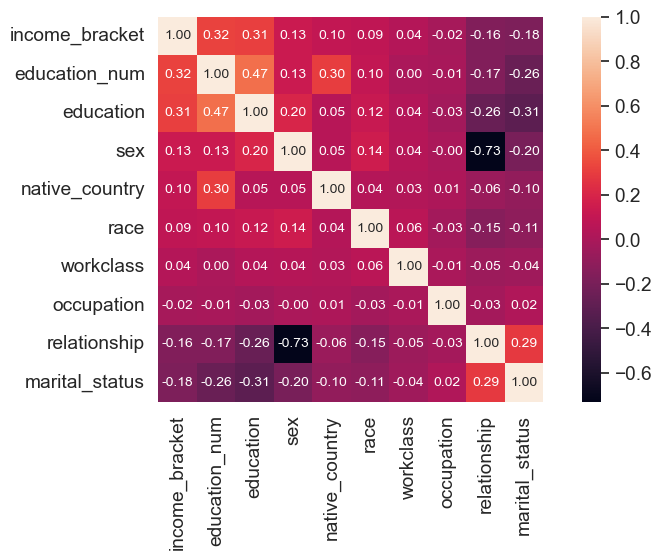

In [385]:
# Heatmap korelasi antara target dengan fitur (kategorikal)
plt.figure(figsize=(10,5))
v = df_encoder[cat_col].corr(numeric_only=True).nlargest(14, 'income_bracket')['income_bracket'].index
i = np.corrcoef(df_encoder[v].values.T)
sns.set(font_scale=1.25)
rm = sns.heatmap(i, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=v.values, xticklabels=v.values)
plt.show()

In [386]:
df_encoder[cat_col].corr(numeric_only = True).nlargest(10, 'income_bracket')['income_bracket']

income_bracket    1.000000
education_num     0.322967
education         0.310645
sex               0.129859
native_country    0.096486
race              0.086860
workclass         0.036009
occupation       -0.017444
relationship     -0.163641
marital_status   -0.180145
Name: income_bracket, dtype: float64

- Dapat dilihat pada heatmap ataupun hasil di aats bahwa education_num dan education merupakan kategori yang memiliki korelasi paling tinggi dengan pendapatan dari fitur yang lain 

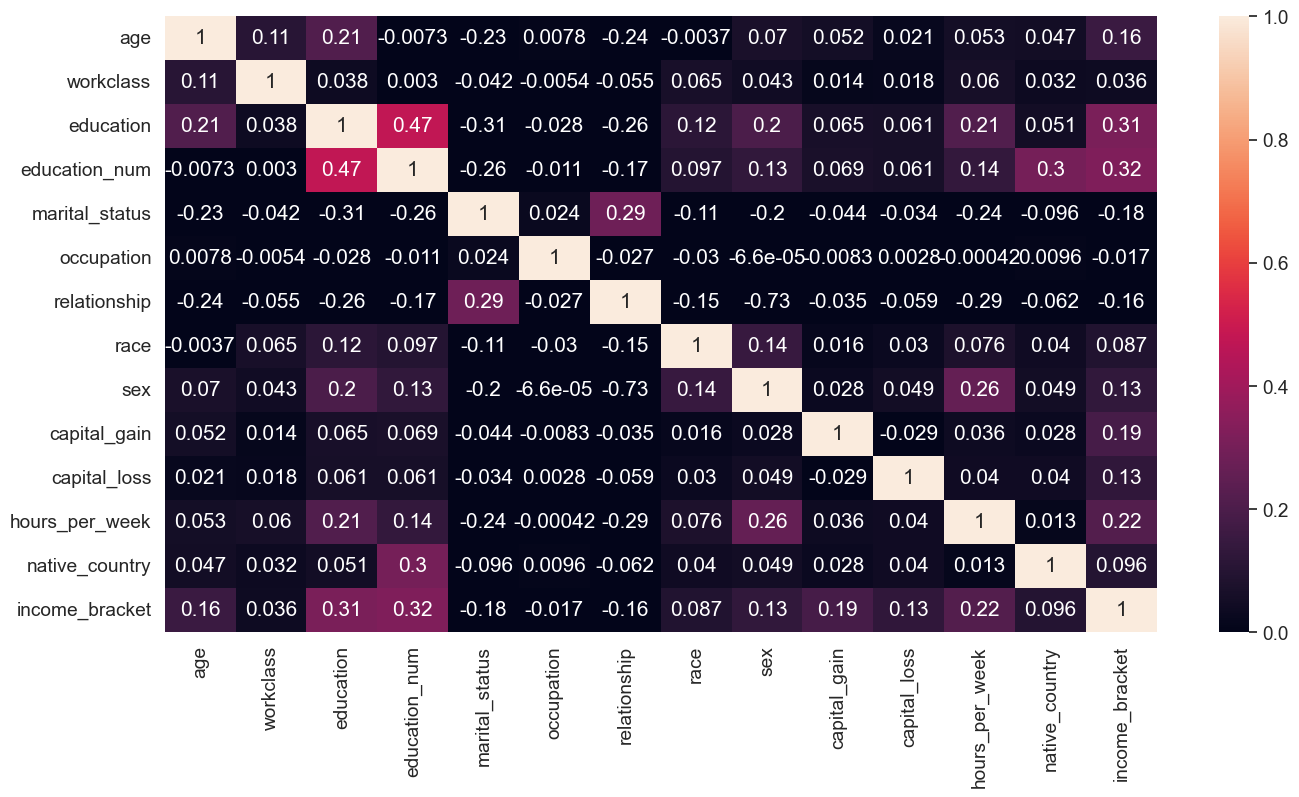

In [387]:
# Heatmap korelasi antara target dengan fitur (numerik dan kategorikal)
corr = df_encoder.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

In [388]:
df_encoder.corr(numeric_only = True).nlargest(14, 'income_bracket')['income_bracket']

income_bracket    1.000000
education_num     0.322967
education         0.310645
hours_per_week    0.215285
capital_gain      0.187150
age               0.156080
sex               0.129859
capital_loss      0.127972
native_country    0.096486
race              0.086860
workclass         0.036009
occupation       -0.017444
relationship     -0.163641
marital_status   -0.180145
Name: income_bracket, dtype: float64

- Melihat korelasi keseluruhan baik fitur kategorik ataupun numerikal dengan target
- Berdasarkan heatmap diatas fitur education_num merupakan fitur yang berkorelasi paling tinggi dengan target

In [389]:
# Melihat korelasi antara target dengan fitur (numerik dan kategorikal) menggunakan function phik matrix
df.phik_matrix().nlargest(14, 'income_bracket')['income_bracket']

interval columns not set, guessing: ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


income_bracket    1.000000
education_num     0.509211
education         0.509211
relationship      0.443380
occupation        0.346531
age               0.340184
hours_per_week    0.312144
marital_status    0.294440
capital_gain      0.270898
sex               0.201036
native_country    0.173276
workclass         0.156763
capital_loss      0.133562
race              0.077436
Name: income_bracket, dtype: float64

- Sama seperti heatmap diatas fitur education_num dan education merupakan fitur yang berkorelasi paling tinggi dengan target

# VI. Feature Engineering

In [390]:
# Mengonversi kolom menjadi list dan disimpan pada variabel baru
ncol = df.describe().columns.tolist()
cacol = df.select_dtypes(include =['object']).columns.tolist()

In [391]:
# Numerical overview
df[ncol].describe().T

,count,mean,std,min,25%,50%,75%,max
age,6755.0,40.794375,14.506344,17.0,30.0,40.0,52.0,90.0
education_num,6755.0,7.254330,2.060136,2.0,6.0,8.0,9.0,9.0
capital_gain,6755.0,731.033605,5583.309421,0.0,0.0,0.0,0.0,99999.0
capital_loss,6755.0,87.549075,401.586966,0.0,0.0,0.0,0.0,3900.0
hours_per_week,6755.0,40.343745,12.988457,1.0,40.0,40.0,45.0,99.0


In [392]:
# Categorical overview
df[cacol].describe(include = 'object').T

,count,unique,top,freq
workclass,6755,7,Private,5192
education,6755,8,HS-grad,3264
marital_status,6755,7,Married-civ-spouse,4701
occupation,6755,14,Craft-repair,1295
relationship,6755,6,Husband,4114
race,6755,5,White,5805
sex,6755,2,Male,5282
native_country,6755,40,United-States,5807
income_bracket,6755,2,<=50K,5291


- Melihat data kolom kategorikal/object untuk dicek jumlah cardinalitynya
- Dari jumlah unique tidak terdapat cardinality yang terlalu tinggi kecuali pada kolom native_country 

In [393]:
# Handling cardinality pada kolom native country
mapping = {
    ' United-States': 'North America',
    ' Haiti': 'Caribbean',
    ' Portugal': 'Europe',
    ' Yugoslavia': 'Europe',
    ' Dominican-Republic': 'Caribbean',
    ' Trinadad&Tobago': 'Caribbean',
    ' Mexico': 'North America',
    ' Guatemala': 'Central America',
    ' Puerto-Rico': 'Caribbean',
    ' Canada': 'North America',
    ' Poland': 'Europe',
    ' Outlying-US(Guam-USVI-etc)': 'Oceania',
    ' India': 'Asia',
    ' El-Salvador': 'Central America',
    ' Nicaragua': 'Central America',
    ' Philippines': 'Asia',
    ' Cuba': 'Caribbean',
    ' Columbia': 'South America',
    ' Vietnam': 'Asia',
    ' Jamaica': 'Caribbean',
    ' Ireland': 'Europe',
    ' China': 'Asia',
    ' Japan': 'Asia',
    ' Italy': 'Europe',
    ' Peru': 'South America',
    ' England': 'Europe',
    ' Ecuador': 'South America',
    ' Greece': 'Europe',
    ' Germany': 'Europe',
    ' Hong': 'Asia',
    ' Scotland': 'Europe',
    ' South': 'Africa',
    ' Honduras': 'Central America',
    ' Cambodia': 'Asia',
    ' Thailand': 'Asia',
    ' Laos': 'Asia',
    ' Hungary': 'Europe',
    ' Iran': 'Asia',
    ' Taiwan': 'Asia',
    ' France': 'Europe'
}

# Melakukan penggantian nilai pada kolom native_country
df['native_country_new'] = df['native_country'].replace(mapping)


- Membuat dictionary untuk mapping nilai pada kolom native_country yang tergolong hight cardinality

In [394]:
df.head(2)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,native_country_new
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K,North America
1,77,Private,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,<=50K,North America


In [395]:
# Melihat nilai unik pada native_country_new
df.native_country_new.unique()

array(['North America', 'Caribbean', 'Europe', 'Central America',
       'Oceania', 'Asia', 'South America', 'Africa'], dtype=object)

- Dari 40 label unik pada kolom native_country diubah menjadi 6 label unik berdasarkan wilayah dan dimasukan pada kolom baru yaitu native_country_new. Dan walaupun nantinya native country tidak akan dipilih menjadi salah satu fitur

In [396]:
nba2 = df.iloc[:,[0,3,5,11,13]]
nba2.head()

,age,education_num,occupation,hours_per_week,income_bracket
0,39,5,Other-service,34,<=50K
1,77,5,Priv-house-serv,10,<=50K
2,38,5,Other-service,24,<=50K
3,28,5,Protective-serv,40,<=50K
4,37,5,Machine-op-inspct,48,<=50K


Berdasarkan tabel di atas disimpulkan bahwa :
- Kolom age, education num, occupation, hours per week akan dijadikan sebagai fitur, karena berdasarkan analisis pada EDA di atas keempat kolom tersebut memiliki korelasi yang paling besar dari kolom-kolom yang lainnya.
- Kolom Price sebagai target.
- Keempat fitur tersebut dipilih juga menurut saya karena pendapatan rumah tangga dipengaruhi oleh jenis pekerjaan, lama bekerja, usia, dan pendidikan yang tinggi mendapatkan peluang untuk mendapatkan penghasilan yang lebih tinggi


In [397]:
# Calculating VIF (Multicollinearity)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [398]:
jk = nba2.iloc[:,[0,3]]
calc_vif(jk)

,variables,VIF
1,hours_per_week,5.3833
0,age,5.3833


- VIF = 5.3, VIF yang melebihi 5 atau 10 menunjukkan multikolinearitas yang tinggi antara variabel independen ini dengan variabel lainnya
- Namun ada beberapa sumber salah satu diantaranya berdasarkan 'https://simdos.unud.ac.id/uploads/file_pendidikan_1_dir/916b245783248fd2ef4bd2482c91cc3f.pdf' dikatakan bahwa  nilai VIF < 10, maka dapat disimpulkan bahwa tidak terdapat multikolinearitas antara variabel. Jadi bisa dikatakan nilai VIF = 5.3 tidak terdapat multikolinearitas yang tinggi antara variabel

# Data Splitting

In [399]:
# Split Fitur dan Target
X = nba2.drop('income_bracket', axis=1)
y = nba2['income_bracket']

In [400]:
# Split Train dan Test
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
print(f'train size: {X_train.shape}')
print(f'test size: {X_test.shape}')

train size: (5404, 4)
test size: (1351, 4)


In [401]:
# Menampilkan kolom numerical dan kolom kategorical 
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['age', 'education_num', 'hours_per_week']
Categorical Columns :  ['occupation']


# Handling Outlier

In [402]:
# Membuat variabel baru dari X_train berdasarkan data kategorikal dan numerik
num_col = X_train.iloc[:,[0,3]].copy()
cat_col = X_train.iloc[:,[1,2]].copy()

In [403]:
# Membuat function untuk handling outlier
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=20)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [404]:
# Cek skew pada kolom age dan kolom hours_per_week
num_col.apply(lambda x: round(x.skew(), 3))

age               0.299
hours_per_week    0.506
dtype: float64

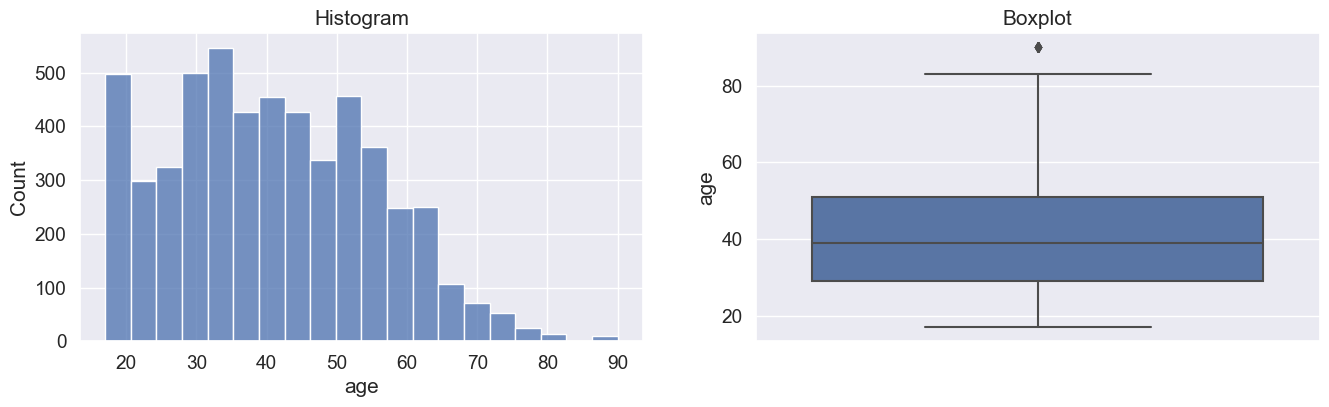


Skewness Value :  0.2987699234832279


In [405]:
# Cek skew dan outlier pada kolom age dengan boxplot dan histogram
diagnostic_plots(X_train, 'age')
print('\nSkewness Value : ', X_train['age'].skew())

- Dari histogram di atas dapat dilihat bahwa distribusi pada age/usia terdistribusi normal dengan nilai skewness yaitu 0.2987699234832279 dan terlihat sedikit adanya right-end outliers pada boxplot

In [406]:
def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

- Handling outliers dengan Z-Score karena data pada kolom age terdistribusi normal

In [407]:
# Menghitung boundaries outliers
upper_boundary, lower_boundary = find_normal_boundaries(X_train, 'age')
upper_boundary, lower_boundary

(84.35108844757849, -2.9236273076821035)

- Batas atas usia outliers bernilai 84 tahun
- Hanya sedikit orang yang berusia 84 tahun berdasarkan data yang sudah dilakukan analisis orang tertua berusia 90 tahun
- Batas bawah bernilai negatif (-2.92). Karena usia negatif tidak ada, maka untuk mencari outlier menggunakan batas atas saja.

In [408]:
# Melihat nilai boundaries outliers dan persentasenya
print('Outliers upper_boundary (right end outliers) 84 : {}'.format(len(X_train[X_train['age'] > upper_boundary])))
print ('')
print('Persentase right end outliers 84: {}'.format(len(X_train[X_train['age'] > upper_boundary])*100/len(X_train)))


Outliers upper_boundary (right end outliers) 84 : 9

Persentase right end outliers 84: 0.16654330125832717


- Handling outliers akan dilakukan dengan cara ditrimming karena persentase outliers tidak mencapai 5 %.

In [409]:
# Menampilkan index outliers pada kolom age
X_train.query('age > @upper_boundary').index

Int64Index([1403, 7488, 5175, 417, 1805, 6545, 622, 7261, 3427], dtype='int64')

- Index outliers yang terdapat pada kolom age yang nantinya akan ditrimming (Length = 9)

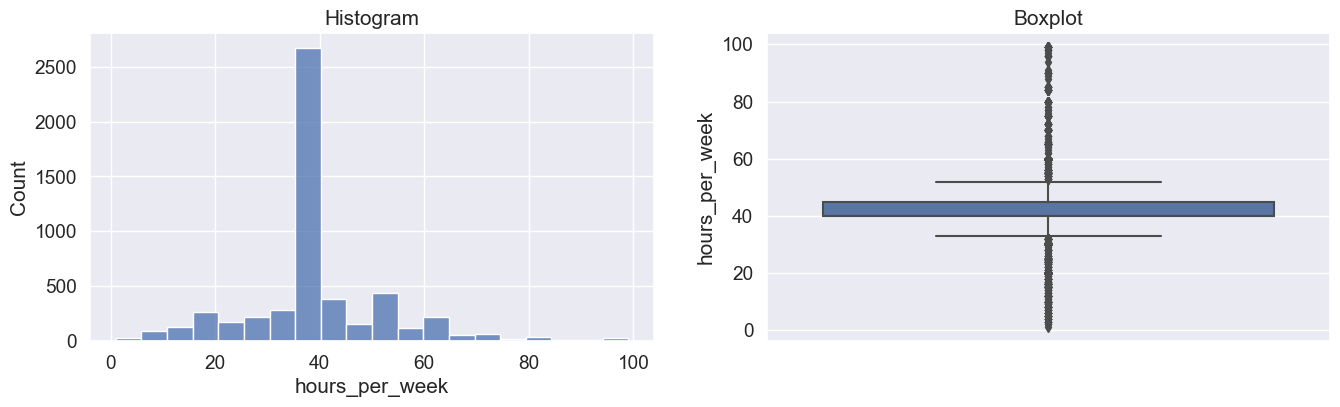


Skewness Value :  0.5057007480820951


In [410]:
# Cek skew dan outlier pada kolom hours_per_week dengan boxplot dan histogram
diagnostic_plots(X_train, 'hours_per_week')
print('\nSkewness Value : ', X_train['hours_per_week'].skew())

- Dari histogram di atas dapat dilihat bahwa distribusi pada hours per week/jam kerja per minggu terdistribusi normal dimana terdapat skewness 0.5 dan terlihat adanya right-end outliers dan left-end outliers pada boxplot

In [411]:
def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

- Handling outliers dengan Z-Score karena data terdistribusi normal

In [412]:
# Menghitung boundaries outliers
upper_boundary, lower_boundary = find_normal_boundaries(X_train, 'hours_per_week')
upper_boundary, lower_boundary

(79.52056193656688, 1.277365524573014)

- Batas atas outliers orang bekerja per minggunya bernilai 79 jam
- Berdasarkan data yang sudah dianalisis jam kerja orang perminggu paling lama adalah 99 jam

In [413]:
# Melihat nilai persentase outliers pada kolom hours per week
print('Outliers upper_boundary (right end outliers) 79 : {}'.format(len(X_train[X_train['hours_per_week'] > upper_boundary])))
print('Outliers lower_boundary (left end outliers ) 1 : {}'.format(len(X_train[X_train['hours_per_week'] < lower_boundary])))
print ('')
print('Persentase right end outliers 79: {}'.format(len(X_train[X_train['hours_per_week'] > upper_boundary])*100/len(X_train)))
print('Persentase left end outliers  1: {}'.format(len(X_train[X_train['hours_per_week'] < lower_boundary])*100/len(X_train)))

Outliers upper_boundary (right end outliers) 79 : 84
Outliers lower_boundary (left end outliers ) 1 : 1

Persentase right end outliers 79: 1.5544041450777202
Persentase left end outliers  1: 0.018504811250925242


- Handling outliers akan dilakukan dengan cara ditrimming karena persentase outliers tidak mencapai 5 %.

In [414]:
# Menampilkan index outliers pada kolom hours_per_week
X_train.query('hours_per_week > @upper_boundary').index

Int64Index([1164,  742, 2398, 7212, 7856, 1247, 4554, 7528, 1583,  177, 7866,
            3246, 4518, 7715, 7620, 7718, 7863, 7487, 7858, 7714, 2762, 3538,
            7859, 7855, 4555, 2458,  757, 7873, 5448, 7849, 4452, 7149, 7861,
            4546, 2209, 7862, 2761, 4451, 3210, 7854, 4543, 7846, 3774, 2200,
            7711, 5421, 3463, 7703, 3260, 7850, 7527, 4539, 3263, 7204, 5362,
            4522, 7872, 7844, 7707, 4558,  758, 5406, 4562, 4513, 5405, 5422,
            5432, 5428, 7144, 3448, 5359,  514, 7865, 1085, 3461, 2659, 5445,
            7869, 4241, 2102, 7867, 4560, 7716, 1254],
           dtype='int64')

- Index outliers yang terdapat pada kolom hours_per_week yang nantinya akan ditrimming (Length = 84)

In [415]:
# Trimming outliers di X_train dan y_train
X_train_clear = X_train[~((X_train['age']>84.35108844757849)|(X_train['hours_per_week']>79.52056193656688)|(X_train['hours_per_week']<1.277365524573014))]

outliers = X_train[((X_train['age']>84.35108844757849)|(X_train['hours_per_week']>79.52056193656688)|(X_train['hours_per_week']<1.277365524573014))]
outliers.index

y_train_clear = y_train.drop(list(outliers.index))

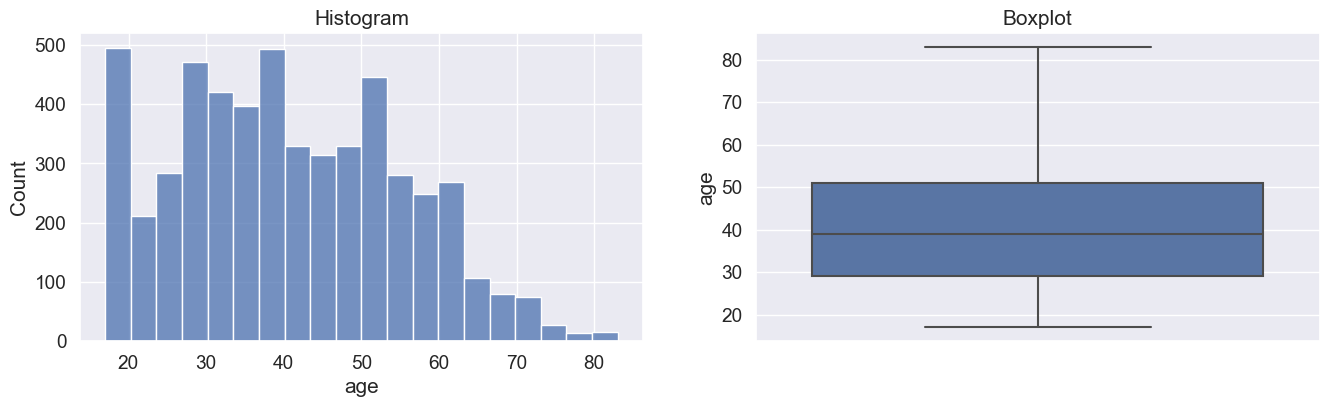


Skewness Value :  0.25851734446580893


In [416]:
# Cek skew dan outlier pada kolom age dengan boxplot dan histogram
diagnostic_plots(X_train_clear, 'age')
print('\nSkewness Value : ', X_train_clear['age'].skew())

- Setelah outliers dihandling nilai skew pada age menjadi 0.25851734446580893

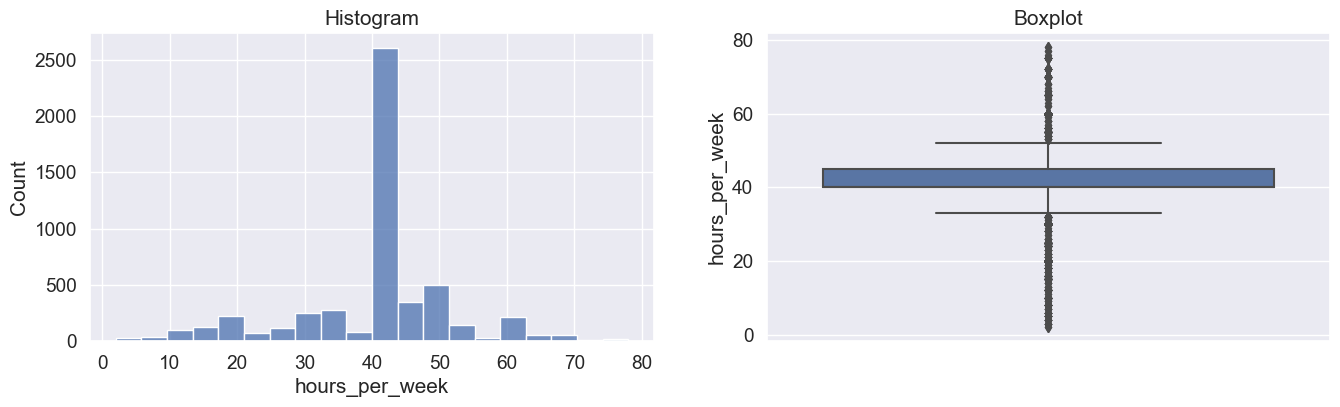


Skewness Value :  -0.2954897709916245


In [417]:
# Cek skew dan outlier pada kolom age dengan boxplot dan histogram
diagnostic_plots(X_train_clear, 'hours_per_week')
print('\nSkewness Value : ', X_train_clear['hours_per_week'].skew())

- Setelah outliers dihandling nilai skew pada hours_per_week menjadi -0.2954897709916245

In [418]:
X_train.shape

(5404, 4)

In [419]:
# X train tanpa outliers
X_train_clear

,age,education_num,occupation,hours_per_week
3880,48,9,Adm-clerical,40
6407,45,9,Handlers-cleaners,40
331,27,5,Priv-house-serv,24
3079,37,3,Other-service,40
7166,51,9,Craft-repair,40
...,...,...,...,...
1190,26,6,Handlers-cleaners,40
3286,38,4,Craft-repair,36
3111,37,3,Farming-fishing,32
6763,36,9,Machine-op-inspct,45


- Setelah ditrimming outliersnya jumlah baris pada X_train menjadi berkurang dari 5404 menjadi 5310

# Encoding

In [420]:
cat_clear = X_train_clear.iloc[:,[1,2]].copy()
num_clear = X_train_clear.iloc[:,[0,3]].copy()

In [421]:
# ord = OrdinalEncoder()
# ord_encoder = ord.fit_transform(cat_clear[['education_num']])
# X_test_ord = ord.transform(X_test[['education_num']])

- Pada fitur education num tidak dilakukan proses encoding (ordinal encoding) dikarenakan data sudah berurutan
- Ordinal Encoder mengubah data kategorikal menjadi nilai integer berdasarkan urutan kategori yang ada. Ordinal Encoder lebih cocok digunakan pada data kategorikal yang memiliki urutan atau tingkat prioritas.

In [422]:
# Membuat instance dari OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# Melakukan one-hot encoding pada kolom name
ohe_encoder = ohe.fit_transform(cat_clear[['occupation']])
X_test_ohe = ohe.transform(X_test[['occupation']])

- One Hot Encoder yaitu teknik untuk mengubah data kategorik menjadi data numerik atau yang juga dikenal sebagai dummy variables. 
- Kolom occupation yang dtype object/kategorik diubah menjadi data numerik

# Scaling

In [423]:
# Scaling dengan MinMaxScaler
mm = MinMaxScaler()

# Melakukan scaling pada kolom distance
mm_scaler = mm.fit_transform(num_clear)    
X_test_scaler = mm.transform(X_test[['age','hours_per_week']])

- Pada kolom age dan hours per week (fitur) dilakukan scaling/normalisasi untuk mengubah nilai-nilai dari fitur tersebut ke dalam skala yang sama.
- Teknik scaling yang digunkan yaitu teknik MinMaxScaler untuk menyamakan skala pada kolom age dan hours per week. MinMaxScaler adalah teknik scaling yang sederhan untuk menghilangkan perbedaan skala antar variabel dan bukan untuk mengubah bentuk distribusi datanya. 
- Hasil scaling dengan standardscaler dan robustscaler tidak jauh berbeda tetapi scaling dengan minmaxscaler lebih bagus, makadari itu saya menggunakan minmaxscaler untuk menyamakan skala pada data.

In [424]:
# Concate Columns
X_train_final= np.concatenate([X_train_clear['education_num'].values.reshape(5310,1),ohe_encoder,mm_scaler],axis=1)
X_test_final= np.concatenate([X_test['education_num'].values.reshape(1351,1),X_test_ohe,X_test_scaler],axis=1)

# VII. Model Definition 

# -Logistic Regression-

In [425]:
# Train the Model Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_final,y_train_clear)

LogisticRegression()

- Algoritma yang dipakai adalah Logistik Regression.
- Model logistik regresi adalah salah satu metode analisis statistik yang digunakan untuk memprediksi hubungan antara satu atau lebih variabel independen dengan variabel dependen yang bersifat biner. Variabel dependen biner adalah variabel yang hanya memiliki dua nilai, seperti benar atau salah, ya atau tidak, sukses atau gagal, dan sebagainya.
- Logistik regresi bersifat fleksibel dapat diterapkan pada berbagai jenis data, termasuk data yang tidak terdistribusi normal.

# -Support Vector Machines (SVM)-

In [426]:
# Train the Model SVC
model_svc = SVC(kernel='poly', C=2, degree=4,random_state = 42, probability=True)
model_svc.fit(X_train_final,y_train_clear)

SVC(C=2, degree=4, kernel='poly', probability=True, random_state=42)

- Algoritma yang dipakai adalah SVC (Support Vector Machine Classifier)
- SVC adalah algoritma pembelajaran mesin untuk klasifikasi. SVC digunakan untuk membagi dataset menjadi dua kelas dengan membuat garis/permukaan pemisah yang optimal antara kedua kelas tersebut.
- SVC bekerja dengan mencari hyperplane yang dapat memaksimalkan margin (jarak) antara dua kelas. Hyperplane adalah garis atau permukaan yang digunakan untuk memisahkan kedua kelas. Margin adalah jarak antara hyperplane dengan titik-titik terdekat dari kedua kelas.
- SVC dapat menggunakan kernel function untuk memetakan data ke dalam dimensi yang lebih tinggi, sehingga dapat meningkatkan performa model dalam memisahkan kelas yang saling tumpang tindih (overlapping class).
- Algoritma SVC memerlukan pengaturan parameter yang tepat untuk mencapai performa yang optimal. Jika parameter yang dipilih tidak sesuai, maka performa model bisa menurun.

# VIII. Model Training

# -Logistic Regression-

In [427]:
# Predict Train-Set and Test-Set Logistic Regression
y_train_pred = logreg_model.predict(X_train_final)
y_test_pred = logreg_model.predict(X_test_final)

In [428]:
X_test.iloc[9]

age                               17
education_num                      7
occupation         Handlers-cleaners
hours_per_week                    12
Name: 1696, dtype: object

In [429]:
# Nilai y test predic model Logistic Regression
y_test_pred[9]

' <=50K'

- Prediksi income bracket = <=50K

# -Support Vector Machines (SVM)-

In [430]:
# Predict Train-Set and Test-Set Model SVC
y_train_psvc = model_svc.predict(X_train_final)
y_test_psvc = model_svc.predict(X_test_final)

In [431]:
# Nilai y test predic model SVC
y_test_psvc[9]

' <=50K'

- Prediksi income bracket = <=50K

# IX. Model Evaluation

# -Logistic Regression-

In [432]:
# Prediksi probabilitas
pred_prob = logreg_model.predict_proba(X_train_final)

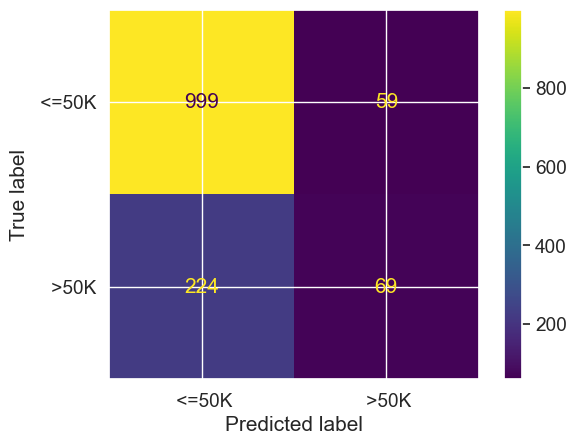

In [433]:
# Grafik confusion matrix 
cm = confusion_matrix(y_test, y_test_pred, labels=logreg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg_model.classes_)

disp.plot()
plt.show()

- Confusion matriks merangkum hasil prediksi model yang memberikan gambaran berapa jumlah prediksi yang benar dan yang salah. Tabel ini memiliki empat kotak yang mewakili empat kemungkinan hasil prediksi: True Positive (TP), False Positive (FP), True Negative (TN), dan False Negative (FN).
- True Positive (TP): Jumlah data yang sebenarnya positif dan diprediksi positif. Pada grafik, nilai TP terdapat pada kotak kanan atas, yaitu 69.
- False Positive (FP): Jumlah data yang sebenarnya negatif tetapi diprediksi positif. Pada grafik, nilai FP terdapat pada kotak kanan bawah, yaitu 224.
- True Negative (TN): Jumlah data yang sebenarnya negatif dan diprediksi negatif. Pada grafik, nilai TN terdapat pada kotak kiri bawah, yaitu 999.
- False Negative (FN): Jumlah data yang sebenarnya positif tetapi diprediksi negatif. Pada grafik, nilai FN terdapat pada kotak kiri atas, yaitu 59.
- Dari grafik tersebut, kita dapat menyimpulkan bahwa model cenderung lebih baik dalam memprediksi kelas <=50k daripada kelas >50k, karena jumlah TP lebih rendah dan jumlah FP lebih tinggi pada kelas >50k. Dalam hal ini, kita dapat melakukan evaluasi lebih lanjut dan mengambil tindakan untuk meningkatkan performa model dalam memprediksi kelas >50k.

In [434]:
y_train_pp= logreg_model.predict_proba(X_train_final)[:,1]
y_test_pp = logreg_model.predict_proba(X_test_final)[:,1]

In [435]:
# Model Evaluation
print("="*10,"TRAINING","="*10)
print(classification_report(y_train_clear,y_train_pred,zero_division=0))
print('Accuracy Score Train : ',accuracy_score(y_train_clear,y_train_pred))
print('AUC Score Train:',roc_auc_score(y_train_clear,y_train_pp))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test,y_test_pred,zero_division=0))
print('Accuracy Score Test : ',accuracy_score(y_test,y_test_pred))
print('AUC Score Test:',roc_auc_score(y_test,y_test_pp))

========== TRAINING ==========
              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88      4168
        >50K       0.57      0.24      0.34      1142

    accuracy                           0.80      5310
   macro avg       0.69      0.59      0.61      5310
weighted avg       0.77      0.80      0.76      5310

Accuracy Score Train :  0.7969868173258003
AUC Score Train: 0.8136632704854937


========== TEST ==========
              precision    recall  f1-score   support

       <=50K       0.82      0.94      0.88      1058
        >50K       0.54      0.24      0.33       293

    accuracy                           0.79      1351
   macro avg       0.68      0.59      0.60      1351
weighted avg       0.76      0.79      0.76      1351

Accuracy Score Test :  0.7905255366395263
AUC Score Test: 0.812109266630967


- Matriks yang digunakan yaitu AUC Score (Area Under the Curve Score), adalah salah satu metrik evaluasi untuk model klasifikasi yang digunakan untuk mengukur performa model dalam memprediksi kelas target.
- Dari hasil AUC Score Train dan AUC Score Test pada model logistik regresi tersebut, dapat disimpulkan bahwa model tersebut memiliki performa yang cukup baik dalam memprediksi kelas target.
- Nilai AUC Score Train dan AUC Score Test yang relatif sama menunjukkan bahwa model tidak mengalami overfitting atau underfitting tetapi melainkan model tersebut goodfitting, sehingga dapat digunakan untuk memprediksi data baru.
- Jumlah data pada kelas >50K lebih sedikit dibandingkan dengan kelas <=50K, baik pada training set maupun test set. Hal ini menunjukkan bahwa dataset memiliki imbalance class, yang mana kelas >50K dianggap sebagai kelas minoritas, dapat disimpulkan bahwa model masih memerlukan perbaikan untuk dapat memprediksi dengan lebih baik pada kelas >50K.



# -Support Vector Machines (SVM)-

In [436]:
y_train_prob = model_svc.predict_proba(X_train_final)[:,1]
y_test_prob = model_svc.predict_proba(X_test_final)[:,1]

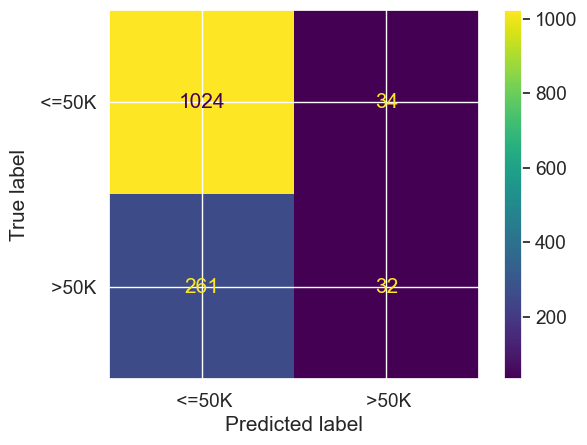

In [437]:
# Grafik confusion matrix 
cm = confusion_matrix(y_test, y_test_psvc, labels=model_svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_svc.classes_)

disp.plot()
plt.show()

- Confusion matriks merangkum hasil prediksi model yang memberikan gambaran berapa jumlah prediksi yang benar dan yang salah. Tabel ini memiliki empat kotak yang mewakili empat kemungkinan hasil prediksi: True Positive (TP), False Positive (FP), True Negative (TN), dan False Negative (FN).
- True Positive (TP): Jumlah data yang sebenarnya positif dan diprediksi positif. Pada grafik, nilai TP terdapat pada kotak kanan atas, yaitu 32.
- False Positive (FP): Jumlah data yang sebenarnya negatif tetapi diprediksi positif. Pada grafik, nilai FP terdapat pada kotak kanan bawah, yaitu 261.
- True Negative (TN): Jumlah data yang sebenarnya negatif dan diprediksi negatif. Pada grafik, nilai TN terdapat pada kotak kiri bawah, yaitu 1024.
- False Negative (FN): Jumlah data yang sebenarnya positif tetapi diprediksi negatif. Pada grafik, nilai FN terdapat pada kotak kiri atas, yaitu 34.
- Dari grafik tersebut, kita dapat menyimpulkan bahwa model cenderung lebih baik dalam memprediksi kelas <=50k daripada kelas >50k, karena jumlah TP lebih rendah dan jumlah FP lebih tinggi pada kelas >50k. Dalam hal ini, kita dapat melakukan evaluasi lebih lanjut dan mengambil tindakan untuk meningkatkan performa model dalam memprediksi kelas >50k.

In [438]:
# Model Evaluation
print("="*10,"TRAINING","="*10)
print(classification_report(y_train_clear,y_train_psvc,zero_division=0))
print('AUC Score Train:',roc_auc_score(y_train_clear,y_train_prob))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test,y_test_psvc,zero_division=0))
print('AUC Score Test:',roc_auc_score(y_test,y_test_prob))

========== TRAINING ==========
              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88      4168
        >50K       0.55      0.15      0.24      1142

    accuracy                           0.79      5310
   macro avg       0.68      0.56      0.56      5310
weighted avg       0.75      0.79      0.74      5310

AUC Score Train: 0.806621460817302


========== TEST ==========
              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.87      1058
        >50K       0.48      0.11      0.18       293

    accuracy                           0.78      1351
   macro avg       0.64      0.54      0.53      1351
weighted avg       0.73      0.78      0.72      1351

AUC Score Test: 0.7876410511171185


- Nilai AUC score pada data training sebesar 0.806, sedangkan pada data test sebesar 0.787. Nilai AUC score yang cukup tinggi pada kedua set data menunjukkan bahwa model dapat membedakan antara kelas positif dan negatif dengan baik.
- Meskipun nilai AUC score cukup tinggi, namun karena model ini masih memiliki kinerja yang buruk dalam memprediksi kelas >50K, hal ini ditunjukkan oleh nilai recall dan f1-score yang rendah pada kelas >50K, baik pada data training  maupun data test, maka perlu dilakukan optimasi lebih lanjut agar model dapat memiliki kinerja yang lebih baik dalam memprediksi kelas minoritas. 

# X. Model Saving

In [439]:
# Save the file
with open('model_logreg.pkl','wb') as file_1:
  joblib.dump(logreg_model, file_1)

with open('model_svc.pkl','wb') as file_2:
  joblib.dump(model_svc, file_2)

with open('model_minmaxscaler.pkl','wb') as file_3:
  joblib.dump(mm, file_3)

with open('model_ohencoder.pkl','wb') as file_4:
  joblib.dump(ohe, file_4)

In [440]:
# Sklearn versi
import sklearn
sklearn.__version__

'1.2.1'

# XI. Kesimpulan

- Berdasarkan hasil evaluasi model yang diberikan, dapat disimpulkan bahwa model yang dibangun mampu memprediksi pendapatan rumah tangga dengan akurasi sekitar 80% pada data train dan sekitar 79% pada data test. Selain itu, AUC score pada data train dan test juga cukup tinggi, yaitu di atas 0.80. Hal ini menunjukkan bahwa model memiliki performa yang baik dalam membedakan antara kelas <=50K dan >50K. Namun, terdapat ketidakseimbangan pada jumlah sampel antara kelas <=50K dan >50K, di mana jumlah sampel pada kelas <=50K jauh lebih banyak daripada pada kelas >50K. 
- Tingkat akurasi model pada data train dan test memiliki nilai yang cukup baik, yaitu sekitar 80%, namun masih ada ruang untuk peningkatan akurasi model.
- AUC score pada data train dan test juga menunjukkan kinerja model yang baik, yaitu sekitar 0.81, yang berarti model mampu membedakan dengan baik antara kelas <=50K dan >50K.
- Precision dan recall untuk kelas >50K pada data train dan test masih relatif rendah, yaitu di bawah 60%, yang berarti model masih memiliki kesulitan dalam mengenali dan memprediksi kelas >50K. Hal ini dapat menjadi fokus untuk pengembangan model selanjutnya.
- Hasil evaluasi model pada data test menunjukkan bahwa model tidak overfitting, karena nilai akurasi dan AUC score pada data test tidak jauh berbeda dengan data train.
- Dengan demikian, bisnis dapat menggunakan model ini sebagai alat bantu untuk memprediksi pendapatan rumah tangga. Namun, perlu dilakukan pengembangan dan peningkatan model agar dapat memberikan prediksi yang lebih akurat dan dapat membantu bisnis dalam pengambilan keputusan yang lebih baik.

# Conceptual Problems
- Jawab pertanyaan berikut:

1. Apakah yang dimaksud dengan coeficient pada logistic regression?
Jawaban : 
- Koefisien di regresi menyatakan hubungan searah atau berbalik arah antara variabel independen dan variabel dependen. Jika koefisien bernilai positif, maka hubungan variabel independen dan variabel dependen adalah hubungan searah. Coefficient pada logistic regression adalah ukuran untuk mengukur besarnya pengaruh setiap variabel independen terhadap variabel dependen. Coefficient menunjukkan seberapa banyak perubahan yang terjadi pada log-odds ratio (logit) akibat perubahan satu satuan pada variabel independen, dengan asumsi variabel independen lainnya tetap konstan.
- Coeficient pada logistic regression dihitung dengan menggunakan Maximum Likelihood Estimation (MLE), yaitu metode yang digunakan untuk mencari parameter model yang paling mungkin menghasilkan data yang diamati. Coefficient dapat dinyatakan dalam bentuk log-odds ratio atau dalam bentuk odds ratio. Dalam bentuk odds ratio, coefficient menunjukkan rasio peluang (odds) antara kelompok yang dibandingkan dengan kelompok referensi.
(sumber : https://agungbudisantoso.com/arti-koefisien-dan-odds-ratio-pada-regresi-logistik/)

2. Apakah yang dimaksud dengan Support Vector pada SVM?
Jawaban :
- Support vector adalah titik data yang paling dekat dengan hyperplane dan mempengaruhi posisi dan orientasi hyperplane. Dengan menggunakan vektor pendukung ini, kita memaksimalkan margin pengklasifikasi. Menghapus support vector akan mengubah posisi hyperplane. Support vector juga merupakan titik-titik data dalam ruang fitur yang berfungsi sebagai batas keputusan antara dua kelas yang berbeda. Dalam konteks ini, support vector adalah titik data yang paling sulit dibedakan antara dua kelas. SVM mencoba menemukan hyperplane yang dapat memaksimalkan margin, yaitu jarak antara hyperplane dan support vector terdekat. Dalam hal ini, support vector sangat penting karena menentukan lokasi hyperplane dan juga margin yang dihasilkan. Semakin banyak support vector yang dimiliki oleh sebuah model, semakin kompleks model tersebut dan semakin sulit untuk diinterpretasi.
(sumber : https://geospasialis.com/support-vector-machine/)

3. Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!
Jawab :
- Menambah dimensi variabel u/ data yang tidak linear agar bisa linear. Kernel juga berfungsi untuk mengimplementasikan model dalam ruang dimensi yang lebih tinggi tanpa harus menentukan fungsi pemetaan dari ruang masukan ke ruang fitur.
- Parameter kernel pada SVM merupakan parameter yang digunakan untuk memilih jenis fungsi kernel yang akan digunakan dalam pemetaan data dari ruang asal (input space) ke ruang fitur (feature space). Fungsi kernel bertanggung jawab untuk menghitung jarak antara pasangan data dalam ruang fitur, dan kemudian memetakan data ke dalam dimensi yang lebih tinggi untuk meningkatkan kemampuan pemisahan (separability) antar kelas.
Ada beberapa jenis fungsi kernel yang umum digunakan pada SVM, seperti linear, polynomial, radial basis function (RBF), dan sigmoid.
- Kernel linear dapat digunakan untuk data yang linearly separable atau data yang dapat dipisahkan oleh sebuah garis lurus. Artinya, data tersebut memiliki fitur atau karakteristik yang dapat diplot pada sebuah koordinat 2D dan dapat dipisahkan oleh sebuah garis lurus. Contohnya, data yang hanya memiliki dua kelas dan fitur-fiturnya berupa nilai numerik seperti tinggi badan dan berat badan.
- Kernel polynomial pada SVM dapat digunakan untuk karakteristik data yang memiliki pola yang kompleks dan tidak dapat dipisahkan secara linier di antara dua kelas. Kernel polynomial dapat membantu mengubah data ke dimensi yang lebih tinggi sehingga lebih mudah dipisahkan secara linier di ruang fitur yang baru. Dalam kernel polynomial, data diubah ke dimensi yang lebih tinggi dengan fungsi polinomial dan digunakan untuk membangun hyperplane yang memisahkan kedua kelas. Kernel polynomial juga dapat membantu mengatasi overfitting pada data yang memiliki karakteristik tertentu.
- Kernel radial basis function (RBF) dapat digunakan untuk karakteristik data yang kompleks dan sulit untuk dipisahkan secara linear. RBF biasanya digunakan untuk data yang tidak memiliki struktur linier yang jelas atau yang memiliki banyak fitur (dimensi yang tinggi). Contohnya, RBF dapat digunakan untuk pengenalan wajah atau identifikasi pola dalam citra medis, di mana data memiliki banyak fitur dan hubungan non-linear antara fitur.
- Kernel sigmoid biasanya digunakan untuk data yang memiliki karakteristik non-linear dan linier. Namun, kernel ini kurang populer dibandingkan kernel-kernel lainnya seperti kernel RBF atau polynomial karena dapat menghasilkan performa yang buruk pada beberapa kasus. Oleh karena itu, kernel sigmoid jarang digunakan pada SVM.
(sumber : https://sis.binus.ac.id/2022/02/14/support-vector-machine-algorithm/)